<a href="https://colab.research.google.com/github/shubham-walnut-kernels/credit-default-prediction/blob/main/Credit_Default_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **Credit Card Default Prediction**



##### **Project Type**    - Classification
##### **Contribution**    - Team
##### **Team Member 1 -** Shubham Rawat
##### **Team Member 2 -** Atul Rawat

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12,6)

import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan, linear_rainbow
from statsmodels.stats.stattools import durbin_watson, jarque_bera
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import kstest, f_oneway
from sklearn.preprocessing import StandardScaler

### Dataset Loading

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load Dataset
df1 = pd.read_excel('/content/drive/MyDrive/credit_default.xls')

### Dataset First View

In [ ]:
# Dataset First Look
df1.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [ ]:
df1.columns = df1.iloc[0]
df1.drop(0,inplace=True)
credit_df = df1.copy()

In [ ]:
credit_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
credit_df.shape

(30000, 25)

### Dataset Information

In [ ]:
# Dataset Info
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 1 to 30000
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30000 non-null  object
 1   LIMIT_BAL                   30000 non-null  object
 2   SEX                         30000 non-null  object
 3   EDUCATION                   30000 non-null  object
 4   MARRIAGE                    30000 non-null  object
 5   AGE                         30000 non-null  object
 6   PAY_0                       30000 non-null  object
 7   PAY_2                       30000 non-null  object
 8   PAY_3                       30000 non-null  object
 9   PAY_4                       30000 non-null  object
 10  PAY_5                       30000 non-null  object
 11  PAY_6                       30000 non-null  object
 12  BILL_AMT1                   30000 non-null  object
 13  BILL_AMT2                   30000 non-null  ob

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
credit_df.duplicated().sum()

np.int64(0)

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
credit_df.isnull().sum()

,0
0,
ID,0
LIMIT_BAL,0
SEX,0
EDUCATION,0
MARRIAGE,0
AGE,0
PAY_0,0
PAY_2,0
PAY_3,0


### What did you know about your dataset?

Null values donot exist in this data.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
credit_df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DEFAULT'],
      dtype='object', name=0)

In [ ]:
# Dataset Describe
credit_df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,...,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000
unique,30000,81,2,7,4,56,11,11,11,11,...,21548,21010,20604,7943,7899,7518,6937,6897,6939,2
top,29984,50000,2,2,2,29,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
freq,1,3365,18112,14030,15964,1605,14737,15730,15764,16455,...,3195,3506,4020,5249,5396,5968,6408,6703,7173,23364


### Variables Description

Answer Here

### Check Unique Values for each variable.

In [ ]:
for i in range(2, 12):
    col = credit_df.columns[i]
    print(col, sorted(credit_df[col].unique()[:11]))

SEX [1, 2]
EDUCATION [0, 1, 2, 3, 4, 5, 6]
MARRIAGE [0, 1, 2, 3]
AGE [23, 24, 26, 28, 29, 34, 35, 37, 41, 51, 57]
PAY_0 [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
PAY_2 [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
PAY_3 [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
PAY_4 [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
PAY_5 [-2, -1, 0, 2, 3, 4, 5, 6, 7, 8]
PAY_6 [-2, -1, 0, 2, 3, 4, 5, 6, 7, 8]


In [ ]:
credit_df.nunique()

,0
0,
ID,30000
LIMIT_BAL,81
SEX,2
EDUCATION,7
MARRIAGE,4
AGE,56
PAY_0,11
PAY_2,11
PAY_3,11


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
credit_df.drop(columns=["ID"], inplace=True)

credit_df.rename(
    columns={"default payment next month": "DEFAULT"},
    inplace=True
)

credit_df["MARRIAGE"] = credit_df["MARRIAGE"].replace({
    2: "Married",
    1: "Unmarried",
    0: "Others",
    3: "Others"
})

credit_df["SEX"] = credit_df["SEX"].map({
    2: "Male",
    1: "Female"
})

edu_map = {
    1: "Graduate",
    2: "University",
    3: "High School"
}

credit_df["EDUCATION"] = (
    credit_df["EDUCATION"]
    .map(edu_map)
    .fillna("Others")
)

bill_cols = [f"BILL_AMT{i}" for i in range(1, 7)]
pay_cols = [f"PAY_AMT{i}" for i in range(1, 7)]

credit_df["AVG_BILL"] = credit_df[bill_cols].mean(axis=1)
credit_df["AVG_PAYMENT"] = credit_df[pay_cols].mean(axis=1)

credit_df["OUTSTANDING_AMOUNT"] = (
    credit_df["AVG_BILL"] - credit_df["AVG_PAYMENT"]
).clip(lower=0)

credit_df["COST_TO_BANK"] = (
    credit_df["OUTSTANDING_AMOUNT"] * credit_df["DEFAULT"]
)

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

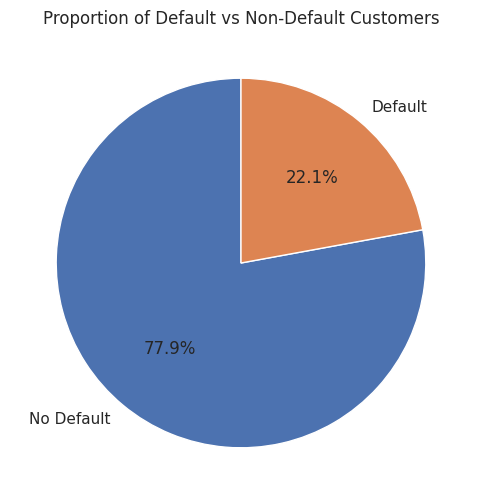

In [ ]:
# Chart - 1 visualization code

default_counts = credit_df["DEFAULT"].value_counts().sort_index()

labels = ["No Default", "Default"]

plt.figure()
plt.pie(
    default_counts.values,
    labels=labels,
    autopct="%1.1f%%",
    startangle=90
)
plt.title("Proportion of Default vs Non-Default Customers")

plt.show()

##### 1. Why did you pick the specific chart?

Communicates class imbalance.

##### 2. What is/are the insight(s) found from the chart?

This shows that defaults are a minority but non-trivial segment of the customer base.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

  This insight drives the need for recall-focused evaluation and threshold tuning to reduce financial risk without unnecessarily rejecting low-risk customers
    
  Treating all 22.1% predicted defaulters as automatically rejected

#### Chart - 2

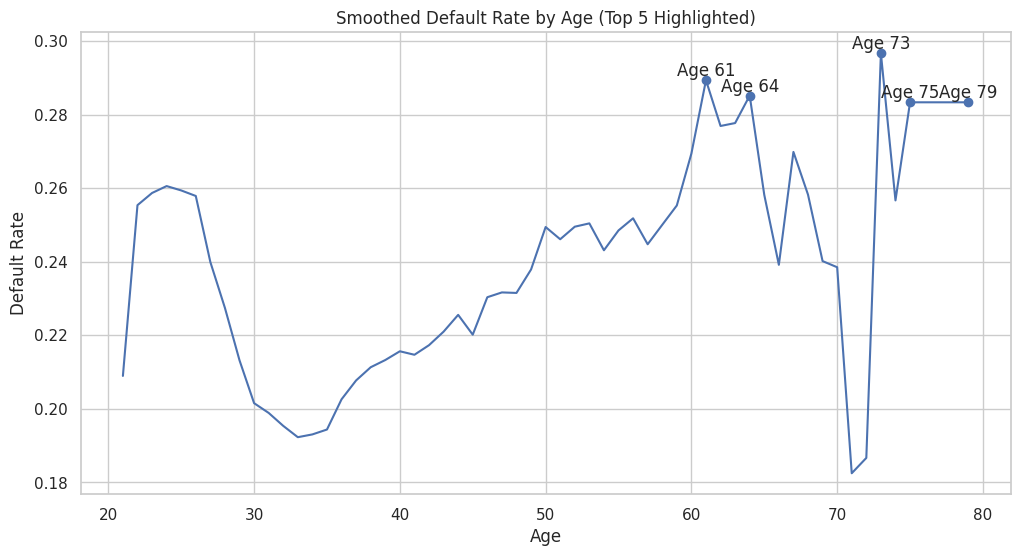

In [ ]:
# Chart - 2 visualization code

# compute default rate and smooth it
age_default_rate = (
    credit_df
    .groupby("AGE")["DEFAULT"]
    .mean()
    .sort_index()
)

smoothed_rate = age_default_rate.rolling(window=5, min_periods=1).mean()

# get top 5 highest points
top_5 = smoothed_rate.nlargest(5)

plt.figure()
plt.plot(smoothed_rate.index, smoothed_rate.values)
plt.scatter(top_5.index, top_5.values)  # mark points

# annotate each top point
for age, rate in top_5.items():
    plt.text(age, rate, f"Age {age}", ha="center", va="bottom")

plt.xlabel("Age")
plt.ylabel("Default Rate")
plt.title("Smoothed Default Rate by Age (Top 5 Highlighted)")

plt.show()

##### 1. Why did you pick the specific chart?

it shows the age groups with

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

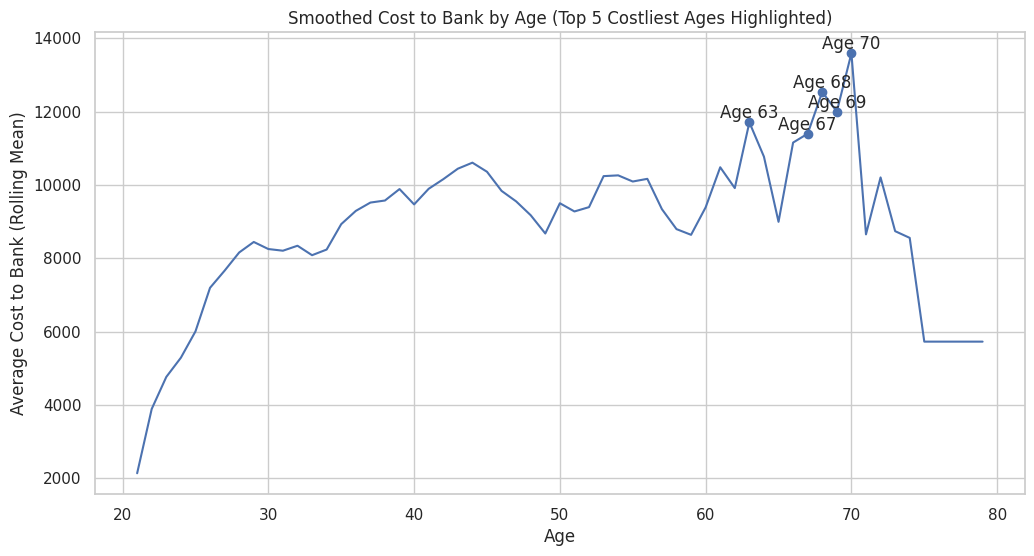

In [ ]:
# Chart - 3 visualization code

# aggregate cost to bank by age
age_cost = (
    credit_df
    .groupby("AGE")["COST_TO_BANK"]
    .mean()
    .sort_index()
)

rolling_age_cost = age_cost.rolling(
    window=5,
    min_periods=1
).mean()

# 3. Identify top 5 costliest ages (from smoothed values)
top_5_costly_ages = rolling_age_cost.nlargest(5)

# 4. Plot
plt.figure()
plt.plot(rolling_age_cost.index, rolling_age_cost.values)
plt.scatter(
    top_5_costly_ages.index,
    top_5_costly_ages.values
)

# 5. Annotate points
for age, cost in top_5_costly_ages.items():
    plt.text(
        age,
        cost,
        f"Age {age}",
        ha="center",
        va="bottom"
    )

plt.xlabel("Age")
plt.ylabel("Average Cost to Bank (Rolling Mean)")
plt.title("Smoothed Cost to Bank by Age (Top 5 Costliest Ages Highlighted)")

plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

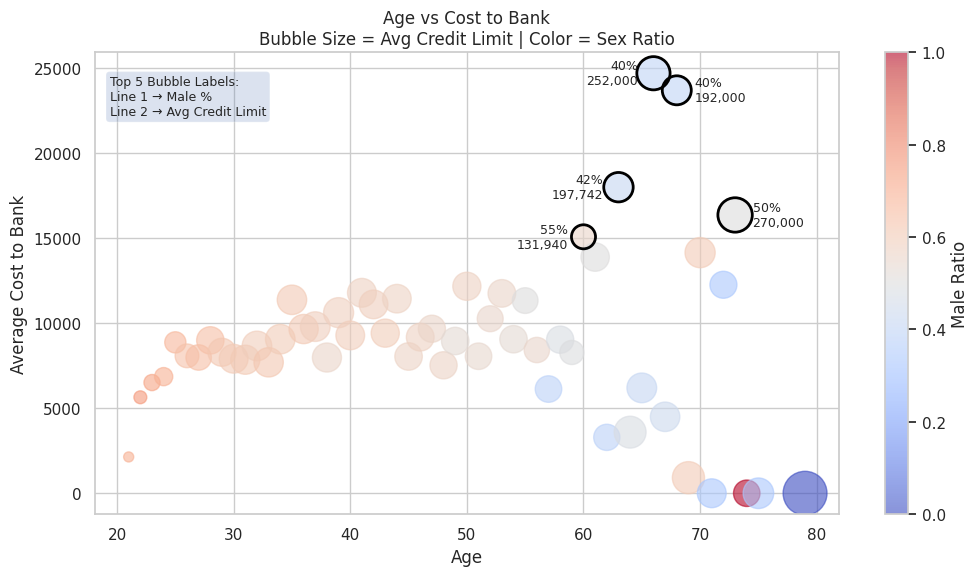

In [ ]:
# Chart - 4 visualization code

# Aggregate data
age_agg = (
    credit_df
    .groupby("AGE")
    .agg(
        avg_cost=("COST_TO_BANK", "mean"),
        avg_limit=("LIMIT_BAL", "mean"),
        male_ratio=("SEX", lambda x: (x == "Male").mean())
    )
    .reset_index()
)

age_agg["avg_cost"] = pd.to_numeric(age_agg["avg_cost"], errors="coerce")
age_agg["avg_limit"] = pd.to_numeric(age_agg["avg_limit"], errors="coerce")
age_agg = age_agg.dropna()

# Bubble size scaling
bubble_size = age_agg["avg_limit"] / age_agg["avg_limit"].max() * 1000

# Top 5 costliest ages
top_5 = age_agg.nlargest(5, "avg_cost")

plt.figure()

# Main scatter
scatter = plt.scatter(
    age_agg["AGE"],
    age_agg["avg_cost"],
    s=bubble_size,
    c=age_agg["male_ratio"],
    cmap="coolwarm",
    alpha=0.6
)

# Highlight top 5
plt.scatter(
    top_5["AGE"],
    top_5["avg_cost"],
    s=(top_5["avg_limit"] / age_agg["avg_limit"].max() * 1000),
    facecolors="none",
    edgecolors="black",
    linewidths=2
)

# sort top 5 by descending cost
top_5_sorted = top_5.sort_values("avg_cost", ascending=False).reset_index(drop=True)

for i, row in top_5_sorted.iterrows():
    # alternate left / right
    if i % 2 == 0:
        x_offset = -1.3   # right
        align = "right"
    else:
        x_offset = 1.5  # left
        align = "left"

    plt.text(
        row["AGE"] + x_offset,
        row["avg_cost"],
        f"{row['male_ratio']*100:.0f}%\n{row['avg_limit']:,.0f}",
        ha=align,
        va="center",
        fontsize=9
    )

plt.xlabel("Age")
plt.ylabel("Average Cost to Bank")
plt.title(
    "Age vs Cost to Bank\n"
    "Bubble Size = Avg Credit Limit | Color = Sex Ratio"
)

# Colorbar key
cbar = plt.colorbar(scatter)
cbar.set_label("Male Ratio")

# Custom legend key (annotation explanation)
plt.text(
    0.02, 0.95,
    "Top 5 Bubble Labels:\nLine 1 → Male %\nLine 2 → Avg Credit Limit",
    transform=plt.gca().transAxes,
    fontsize=9,
    verticalalignment="top",
    bbox=dict(boxstyle="round", alpha=0.2)
)

plt.show()

In [ ]:
age_agg.dtypes


,0
AGE,int64
avg_cost,float64
avg_limit,float64
male_ratio,float64


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

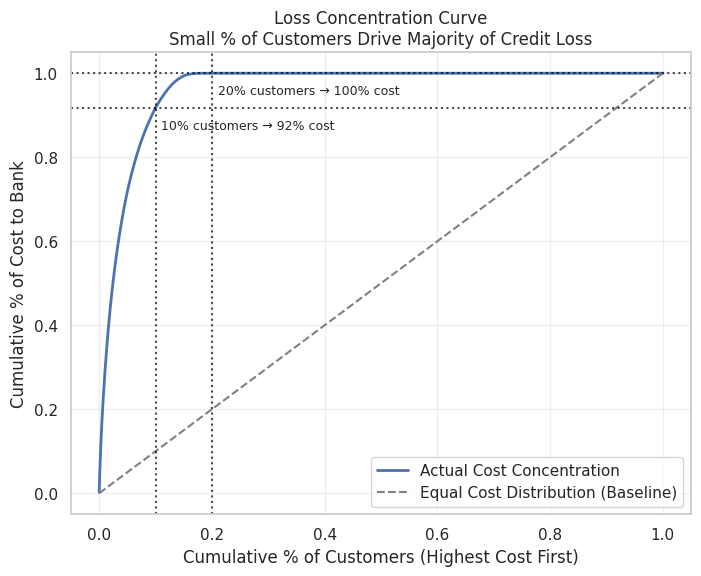

In [ ]:
# Chart - 5 visualization code
cost_df = credit_df[["COST_TO_BANK"]].copy()

cost_df = cost_df.sort_values(
    by="COST_TO_BANK",
    ascending=False
).reset_index(drop=True)

cost_df["cum_cost"] = cost_df["COST_TO_BANK"].cumsum()
total_cost = cost_df["COST_TO_BANK"].sum()

cost_df["cum_cost_pct"] = cost_df["cum_cost"] / total_cost
cost_df["cum_customer_pct"] = (
    (cost_df.index + 1) / len(cost_df)
)

plt.figure(figsize=(8, 6))

# main curve
plt.plot(
    cost_df["cum_customer_pct"],
    cost_df["cum_cost_pct"],
    label="Actual Cost Concentration",
    linewidth=2
)

# baseline (equal distribution)
plt.plot(
    [0, 1], [0, 1],
    linestyle="--",
    color="gray",
    label="Equal Cost Distribution (Baseline)"
)

# key cutoffs
cutoffs = [0.10, 0.20]

for c in cutoffs:
    # cost captured at cutoff
    cost_at_c = cost_df.loc[
        cost_df["cum_customer_pct"] >= c, "cum_cost_pct"
    ].iloc[0]

    # vertical line
    plt.axvline(c, linestyle=":", color="black", alpha=0.7)
    # horizontal line
    plt.axhline(cost_at_c, linestyle=":", color="black", alpha=0.7)

    # annotation
    plt.text(
        c + 0.01,
        cost_at_c - 0.05,
        f"{int(c*100)}% customers → {cost_at_c*100:.0f}% cost",
        fontsize=9
    )

plt.xlabel("Cumulative % of Customers (Highest Cost First)")
plt.ylabel("Cumulative % of Cost to Bank")
plt.title(
    "Loss Concentration Curve\n"
    "Small % of Customers Drive Majority of Credit Loss"
)

plt.legend()
plt.grid(alpha=0.3)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

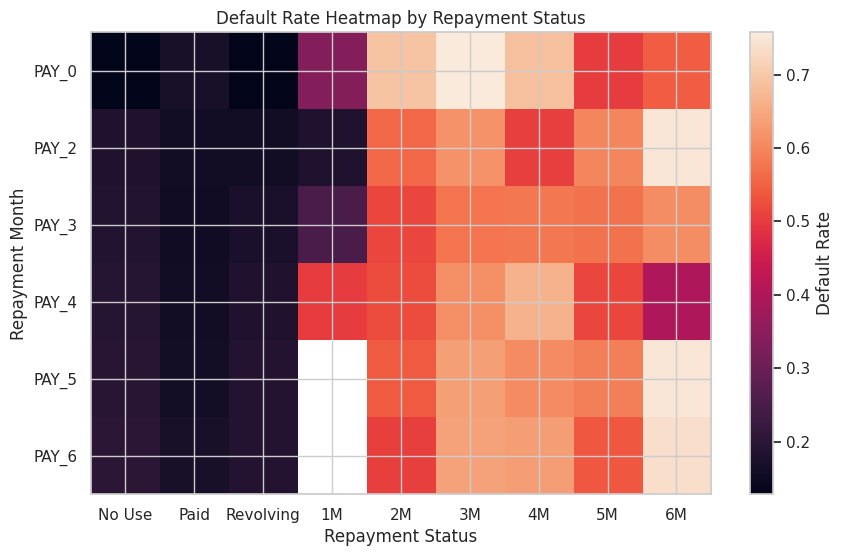

In [ ]:
# Chart - 6 visualization code
pay_cols = ["PAY_0", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6"]

for col in pay_cols:
    credit_df[col] = pd.to_numeric(credit_df[col], errors="coerce")

# Define ordered repayment categories
pay_order = [-2, -1, 0, 1, 2, 3, 4, 5, 6]

heatmap_data = []

for col in pay_cols:
    default_rates = (
        credit_df
        .groupby(col)["DEFAULT"]
        .mean()
        .reindex(pay_order)
        .astype(float)          # 👈 FORCE FLOAT
    )
    heatmap_data.append(default_rates.values)

heatmap_data = np.array(heatmap_data, dtype=float)

plt.figure(figsize=(10, 6))
plt.imshow(heatmap_data, aspect="auto")
plt.colorbar(label="Default Rate")

plt.yticks(range(len(pay_cols)), pay_cols)
plt.xticks(
    range(len(pay_order)),
    ["No Use", "Paid", "Revolving", "1M", "2M", "3M", "4M", "5M", "6M"]
)

plt.xlabel("Repayment Status")
plt.ylabel("Repayment Month")
plt.title("Default Rate Heatmap by Repayment Status")

plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

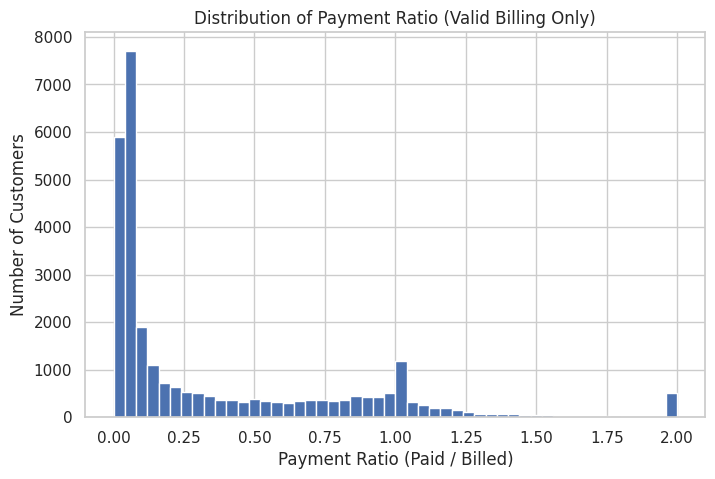

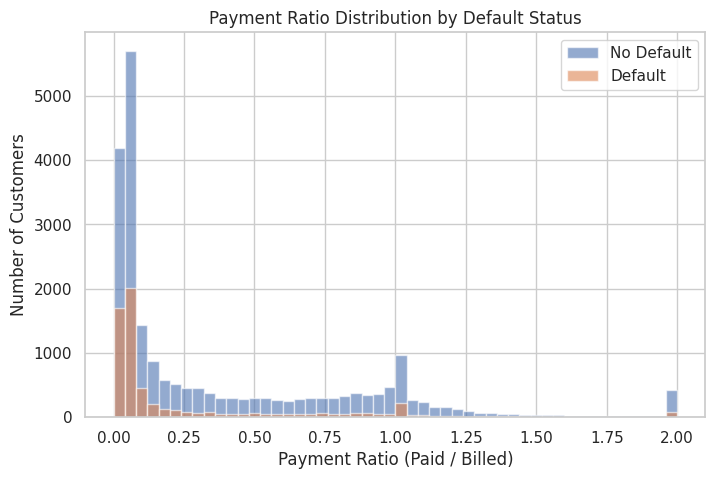

In [ ]:
# Chart - 7 visualization code

# ------------------------------------------------------------------
# STEP 1: Ensure numeric types (CRITICAL)
# ------------------------------------------------------------------
credit_df["AVG_BILL"] = pd.to_numeric(credit_df["AVG_BILL"], errors="coerce")
credit_df["AVG_PAYMENT"] = pd.to_numeric(credit_df["AVG_PAYMENT"], errors="coerce")

# ------------------------------------------------------------------
# STEP 2: Define valid billing behavior
# Only customers with a positive bill have meaningful payment behavior
# ------------------------------------------------------------------
valid_bill_mask = credit_df["AVG_BILL"] > 0

# ------------------------------------------------------------------
# STEP 3: Compute PAYMENT_RATIO safely
# ------------------------------------------------------------------
credit_df["PAYMENT_RATIO"] = pd.NA

credit_df.loc[valid_bill_mask, "PAYMENT_RATIO"] = (
    credit_df.loc[valid_bill_mask, "AVG_PAYMENT"] /
    credit_df.loc[valid_bill_mask, "AVG_BILL"]
)

# ------------------------------------------------------------------
# STEP 4: Clean extreme / invalid values
# ------------------------------------------------------------------
credit_df["PAYMENT_RATIO"] = credit_df["PAYMENT_RATIO"].clip(lower=0, upper=2)

# ------------------------------------------------------------------
# STEP 5: Drop missing values ONLY for visualization
# ------------------------------------------------------------------
ratio_df = credit_df.dropna(subset=["PAYMENT_RATIO"])

# ------------------------------------------------------------------
# STEP 6: Plot – Overall Payment Ratio Distribution
# ------------------------------------------------------------------
plt.figure(figsize=(8, 5))
plt.hist(
    bins=50,
    x=ratio_df["PAYMENT_RATIO"]
)
plt.xlabel("Payment Ratio (Paid / Billed)")
plt.ylabel("Number of Customers")
plt.title("Distribution of Payment Ratio (Valid Billing Only)")
plt.show()

# ------------------------------------------------------------------
# STEP 7: Plot – Payment Ratio by Default Status
# ------------------------------------------------------------------
plt.figure(figsize=(8, 5))

plt.hist(
    ratio_df.loc[ratio_df["DEFAULT"] == 0, "PAYMENT_RATIO"],
    bins=50,
    alpha=0.6,
    label="No Default"
)

plt.hist(
    ratio_df.loc[ratio_df["DEFAULT"] == 1, "PAYMENT_RATIO"],
    bins=50,
    alpha=0.6,
    label="Default"
)

plt.xlabel("Payment Ratio (Paid / Billed)")
plt.ylabel("Number of Customers")
plt.title("Payment Ratio Distribution by Default Status")
plt.legend()
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

/tmp/ipython-input-3643491606.py:56: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("UTIL_BIN")


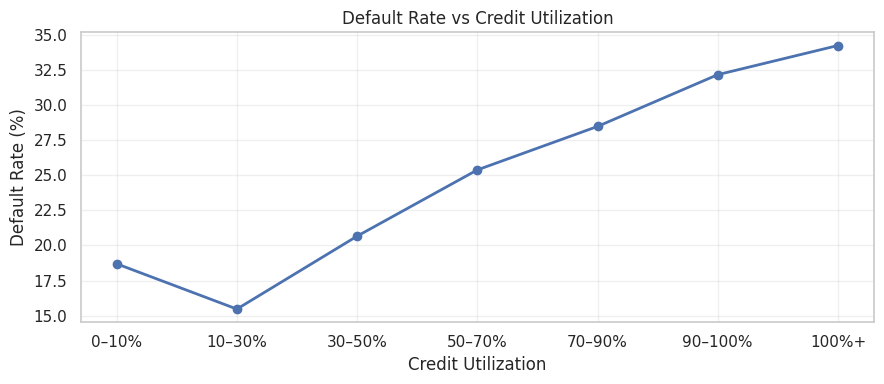

In [ ]:
# Chart - 8 visualization code

# ---------------------------------------------------------
# STEP 1: Ensure numeric columns
# ---------------------------------------------------------
credit_df["LIMIT_BAL"] = pd.to_numeric(credit_df["LIMIT_BAL"], errors="coerce")
credit_df["AVG_BILL"] = pd.to_numeric(credit_df["AVG_BILL"], errors="coerce")

# ---------------------------------------------------------
# STEP 2: Compute Credit Utilization safely
# Utilization = Outstanding Balance / Credit Limit
# ---------------------------------------------------------
credit_df["CREDIT_UTILIZATION"] = pd.NA

valid_mask = (
    (credit_df["LIMIT_BAL"] > 0) &
    (credit_df["AVG_BILL"] >= 0)
)

credit_df.loc[valid_mask, "CREDIT_UTILIZATION"] = (
    credit_df.loc[valid_mask, "AVG_BILL"] /
    credit_df.loc[valid_mask, "LIMIT_BAL"]
)

# Cap extreme values for stability
credit_df["CREDIT_UTILIZATION"] = credit_df["CREDIT_UTILIZATION"].clip(0, 2)

# ---------------------------------------------------------
# STEP 3: Bin Credit Utilization (drop NA only for binning)
# ---------------------------------------------------------
bins = [0, 0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 2.0]
labels = [
    "0–10%",
    "10–30%",
    "30–50%",
    "50–70%",
    "70–90%",
    "90–100%",
    "100%+"
]

util_series = credit_df["CREDIT_UTILIZATION"].dropna()

credit_df.loc[util_series.index, "UTIL_BIN"] = pd.cut(
    util_series,
    bins=bins,
    labels=labels,
    include_lowest=True
)

# ---------------------------------------------------------
# STEP 4: Aggregate default rate and volume per bin
# ---------------------------------------------------------
util_summary = (
    credit_df
    .groupby("UTIL_BIN")
    .agg(
        default_rate=("DEFAULT", "mean"),
        customer_count=("DEFAULT", "count")
    )
    .reset_index()
)

# ---------------------------------------------------------
# STEP 5: Plot Default Rate vs Credit Utilization
# ---------------------------------------------------------
plt.figure(figsize=(9, 4))

plt.plot(
    util_summary["UTIL_BIN"],
    util_summary["default_rate"] * 100,
    marker="o",
    linewidth=2
)

plt.xlabel("Credit Utilization")
plt.ylabel("Default Rate (%)")
plt.title("Default Rate vs Credit Utilization")

plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

y_true = credit_df["DEFAULT"].values
y_pred_proba = y_pred_proba  # output from your model
cost = credit_df["COST_TO_BANK"].values

thresholds = np.linspace(0, 1, 101)
expected_losses = []

for t in thresholds:
    # predicted default at threshold t
    y_pred = (y_pred_proba >= t).astype(int)

    # false negatives = predicted non-default but actually defaulted
    fn_mask = (y_pred == 0) & (y_true == 1)

    # expected loss = sum of exposure for false negatives
    loss = cost[fn_mask].sum()

    expected_losses.append(loss)

plt.figure(figsize=(9, 4))

plt.plot(
    thresholds,
    expected_losses,
    linewidth=2
)

# optimal threshold
optimal_idx = np.argmin(expected_losses)
optimal_threshold = thresholds[optimal_idx]
min_loss = expected_losses[optimal_idx]

plt.axvline(
    optimal_threshold,
    linestyle="--",
    color="red",
    label=f"Optimal Threshold ≈ {optimal_threshold:.2f}"
)

plt.xlabel("Classification Threshold")
plt.ylabel("Expected Loss")
plt.title("Expected Loss vs Classification Threshold")

plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

NameError: name 'y_pred_proba' is not defined

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

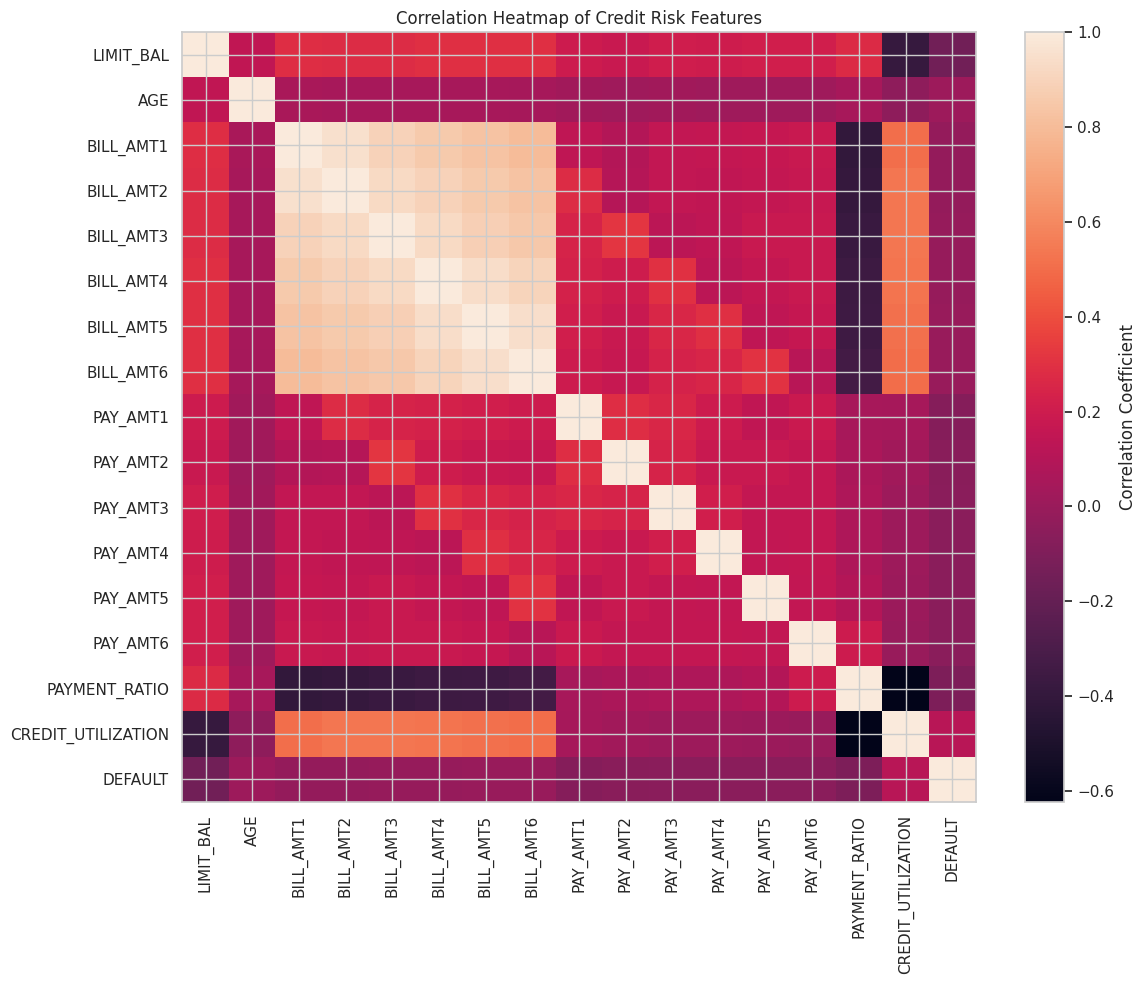

In [ ]:
# Correlation Heatmap visualization code
import pandas as pd
import matplotlib.pyplot as plt

# select numeric columns relevant to risk
corr_cols = [
    "LIMIT_BAL", "AGE",
    "BILL_AMT1", "BILL_AMT2", "BILL_AMT3",
    "BILL_AMT4", "BILL_AMT5", "BILL_AMT6",
    "PAY_AMT1", "PAY_AMT2", "PAY_AMT3",
    "PAY_AMT4", "PAY_AMT5", "PAY_AMT6",
    "PAYMENT_RATIO", "CREDIT_UTILIZATION",
    "DEFAULT"
]

# ensure numeric
credit_df[corr_cols] = credit_df[corr_cols].apply(
    pd.to_numeric, errors="coerce"
)

corr_matrix = credit_df[corr_cols].corr()

plt.figure(figsize=(12, 10))

plt.imshow(corr_matrix, aspect="auto")
plt.colorbar(label="Correlation Coefficient")

plt.xticks(range(len(corr_cols)), corr_cols, rotation=90)
plt.yticks(range(len(corr_cols)), corr_cols)

plt.title("Correlation Heatmap of Credit Risk Features")

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***